# Рекомендация тарифов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Разбиение-данных-на-выборки" data-toc-modified-id="Разбиение-данных-на-выборки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разбиение данных на выборки</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выбор лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Случайный лес</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес-с-дефолтной-глубиной-max_depth=10-и-разным-количеством-деревьев" data-toc-modified-id="Случайный-лес-с-дефолтной-глубиной-max_depth=10-и-разным-количеством-деревьев-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Случайный лес с дефолтной глубиной <code>max_depth=10</code> и разным количеством деревьев</a></span></li><li><span><a href="#Случайный-лес-с-разной-глубиной-и-разным-количеством-деревьев" data-toc-modified-id="Случайный-лес-с-разной-глубиной-и-разным-количеством-деревьев-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Случайный лес с разной глубиной и разным количеством деревьев</a></span></li></ul></li><li><span><a href="#Выбираем-лучшую-модель" data-toc-modified-id="Выбираем-лучшую-модель-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Выбираем лучшую модель</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#(бонус)-Проверка-модели-на-адекватность" data-toc-modified-id="(бонус)-Проверка-модели-на-адекватность-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>(бонус) Проверка модели на адекватность</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Введение
### Описание проекта
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится.

Построем модель с максимально большим значением *accuracy*.

### Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
- *сalls* — количество звонков,
- *minutes* — суммарная длительность звонков в минутах,
- *messages* — количество sms-сообщений,
- *mb_used* — израсходованный интернет-трафик в Мб,
- *is_ultra* — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Знакомство с данными

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/datasets/users_behavior.csv')
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


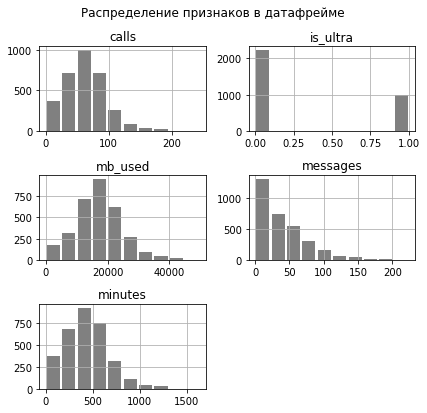

In [5]:
# распределение признаков
pd.concat([data.loc[data.index, :]], axis=1).hist(figsize=(6,6), color='grey', rwidth=0.85)
plt.suptitle('Распределение признаков в датафрейме');
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

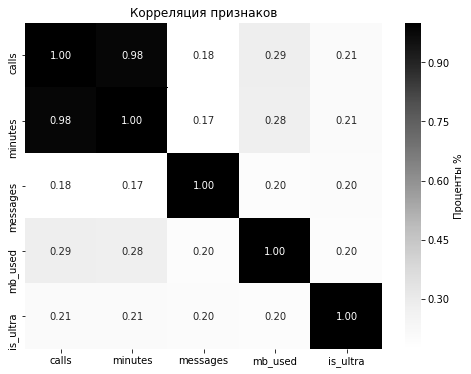

In [6]:
# Корреляция признаков
f, ax = plt.subplots(figsize=[8,6])
sns.heatmap(pd.concat([data.loc[data.index, :]]).corr(),
            annot=True, fmt=".2f",cbar_kws={'label': 'Проценты %'},cmap="Greys",ax=ax)
ax.set_title('Корреляция признаков');

In [7]:
print('Распределение категорий в целевом признаке:')
print(data['is_ultra'].value_counts(normalize=True)*100)
print("0 = Smart", "\n1 = Ultra")

Распределение категорий в целевом признаке:
0    69.352831
1    30.647169
Name: is_ultra, dtype: float64
0 = Smart 
1 = Ultra


In [8]:
corr = data[['calls', 'minutes', 'messages', 'mb_used']].corr()

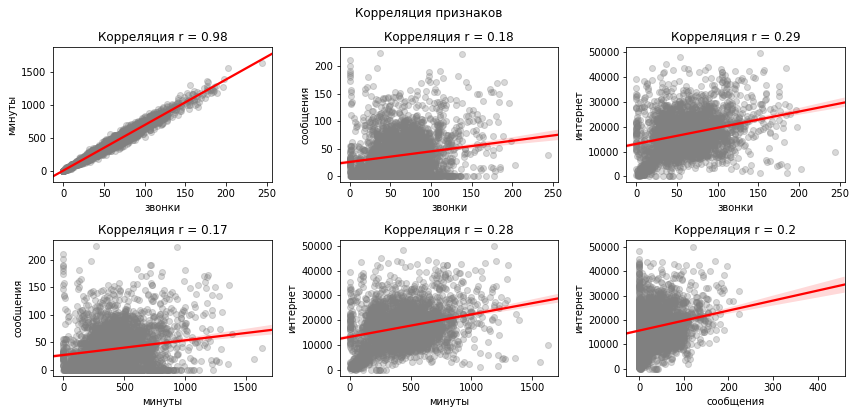

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

# звонки и минуты
sns.regplot(data['calls'], data['minutes'], 
            scatter_kws={'color': 'grey', 'alpha':0.3}, line_kws={'color': 'red'}, ax=ax1)
ax1.set_xlabel('звонки')
ax1.set_ylabel('минуты')
ax1.set_title('Корреляция r = {}'.format(round(corr.at['calls', 'minutes'], 2)));

# звонки и сообщения
sns.regplot(data['calls'], data['messages'], 
            scatter_kws={'color': 'grey', 'alpha':0.3}, line_kws={'color': 'red'}, ax=ax2)
ax2.set_xlabel('звонки')
ax2.set_ylabel('сообщения')
ax2.set_title('Корреляция r = {}'.format(round(corr.at['calls', 'messages'], 2)));

# звонки и интернет
sns.regplot(data['calls'], data['mb_used'], 
            scatter_kws={'color': 'grey', 'alpha':0.3}, line_kws={'color': 'red'}, ax=ax3)
ax3.set_xlabel('звонки')
ax3.set_ylabel('интернет')
ax3.set_title('Корреляция r = {}'.format(round(corr.at['calls', 'mb_used'], 2)));

# минуты и сообщения
sns.regplot(data['minutes'], data['messages'], 
            scatter_kws={'color': 'grey', 'alpha':0.3}, line_kws={'color': 'red'}, ax=ax4)
ax4.set_xlabel('минуты')
ax4.set_ylabel('сообщения')
ax4.set_title('Корреляция r = {}'.format(round(corr.at['minutes', 'messages'], 2)));

# минуты и интернет
sns.regplot(data['minutes'], data['mb_used'], 
            scatter_kws={'color': 'grey', 'alpha':0.3}, line_kws={'color': 'red'}, ax=ax5)
ax5.set_xlabel('минуты')
ax5.set_ylabel('интернет')
ax5.set_title('Корреляция r = {}'.format(round(corr.at['minutes', 'mb_used'], 2)));

# сообщения и интернет
sns.regplot(data['messages'], data['mb_used'], 
            scatter_kws={'color': 'grey', 'alpha':0.3}, line_kws={'color': 'red'}, ax=ax6)
ax6.set_xlabel('сообщения')
ax6.set_ylabel('интернет')
ax6.set_title('Корреляция r = {}'.format(round(corr.at['messages', 'mb_used'], 2)));

fig.suptitle('Корреляция признаков');

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

In [10]:
# удаляем один из мультиколинеарных признаков
data = data.drop(['calls'], axis=1)

**Выводы**  
Данные были подготовлены заранее, поэтому заполнять пропуски или изменять типы не нужно. 

Имеем выборку, состоящую из 3214 объектов. В таблице всего 5 признаков, 1 из который - целевой (`is_ultra`). Выявлено 2 коррелирующих признака: это количество звонков и минуты разговоров. Решено было избавиться от количества звонков. 

Категории в целевом признаке распределены не равномерно: почти 70 % объектов относятся к категории *Smart*, только 30 % - к категории *Ultra*.

## Разбиение данных на выборки

1. Разбиваем датафрейм на признаки *features* и целевой признак *target*:

In [12]:
features = data.drop(['is_ultra'], axis=1)
target = data['is_ultra']

2. Чтобы проверить качество выбранной модели после обучения, а также оценивать её качество в процессе обучения, разобъем данные в пропорции 3:1:1

Сначала нужно отделить `test`, он равен 20% всего датасета, потом `valid`, который равен 25%, в итоге получаем 60-20-20. 

In [13]:
# отделяем test
features_train_valid, features_test, target_train_valid, target_test = train_test_split(
    features, target, test_size=0.2, random_state=123)

In [14]:
# отделяем validation
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_valid, target_train_valid, test_size=0.25, random_state=123)

In [15]:
# проверяем размер получившихся выборок
samples = [features_train, features_valid, features_test, target_train, target_valid, target_test]
for i in samples:
    print(i.shape)

(1928, 4)
(643, 4)
(643, 4)
(1928,)
(643,)
(643,)


## Выбор лучшей модели

Нам нужно решить задачу бинарной классификации, так как пользователи выбирают один из дву предложенных тарифов. Для решения этой задачи обратимся к следующим моделям из библиотеки `sklearn`:
- Логистическая регрессия `LogisticRegression`
- Дерево решений `DecisionTreeClassifier`
- Случайный лес `RandomForestClassifier`

Проверим *Accuracy* на каждой из них, протестируем разные гиперпараметры.

In [16]:
# словарь, где будут храниться лучшие результаты протестированных моделей
models_dict = {}

### Логистическая регрессия

Попробуем обучить регрессию с разными параметрами penalty: L1 и L2

In [17]:
# инициализируем модель логистической регрессии с L2, обучаем её на тренировочной выборке
lrl2_model = LogisticRegression(random_state=123).fit(features_train, target_train)
lrl2_result = lrl2_model.score(features_valid, target_valid) # получаем метрику качества модели на валидационной выборке

# инициализируем модель логистической регрессии с L1, обучаем её на тренировочной выборке
lrl1_model = LogisticRegression(penalty='l1', random_state=123).fit(features_train, target_train)
lrl1_result = lrl1_model.score(features_valid, target_valid) # получаем метрику качества модели на валидационной выборке

print("Качество модели логистической регрессии c L2 на валидационной выборке:", round(lrl2_result, 3))
print("Качество модели логистической регрессии c L1 на валидационной выборке:", round(lrl1_result, 3))

# запишем с ловарь лучший результат модели
models_dict['LR'] = lrl1_result

Качество модели логистической регрессии c L2 на валидационной выборке: 0.703
Качество модели логистической регрессии c L1 на валидационной выборке: 0.737


In [19]:
lrl2_model.coef_

array([[-1.51318054e-02,  1.99368111e-03,  6.73306293e-03,
        -3.08650999e-05]])

In [20]:
lrl1_model.coef_

array([[4.25027481e-04, 1.41240184e-03, 1.08099080e-02, 3.98176487e-05]])

**Вывод:** качество модели логистической регрессии улучшается с 0.70 до 0.73, если штрафовать за переобучение будем Lasso, то есть с помощью суммы модулей весов, а не с помощью дефолтных квадратов.

### Дерево решений
Проведем классификацию деревом решений с разной глубиной дерева

In [17]:
best_tree_model = None
best_tree_result = 0
best_tree_depth = 0
tree_result_list = []

for depth in range(1, 21):
    tree_model = DecisionTreeClassifier(random_state=123, max_depth=depth)
    tree_model.fit(features_train, target_train)
    
    tree_result = tree_model.score(features_valid, target_valid)
    tree_result_list.append(tree_result)

    if tree_result > best_tree_result:
        best_tree_model = tree_model
        best_tree_result = tree_result
        best_tree_depth = depth
        
print('Accuracy лучшей модели в дереве решений:', round(best_tree_result, 3))
print('Достигается при глубине', best_tree_depth)

# запишем с ловарь лучший результат модели
models_dict['DT'] = best_tree_result

Accuracy лучшей модели в дереве решений: 0.784
Достигается при глубине 3


Посмотрим, как глубина дерева влияет на результат.

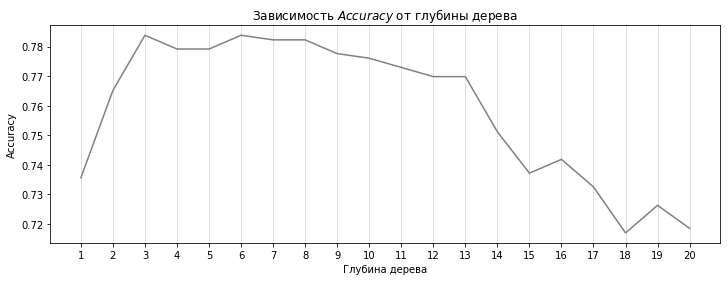

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(tree_result_list)+1), tree_result_list, color='grey')
plt.xlabel('Глубина дерева');
plt.ylabel('Accuracy');
plt.title('Зависимость $Ассuracy$ от глубины дерева');
plt.grid(axis='x', alpha=0.5);
plt.xticks(np.arange(1, len(tree_result_list)+1, step=1));

**Вывод:** решающее дерево показывает лучший результат, чем логистическая регрессия. График позволяет увидеть, как быстро наступает переобучение при увеличении гиперпараметра глубины: самый точный результат классификаци *0.795* достигнут при глубине дерева = 9.

**Вывод:** решающее дерево показывает лучший результат, чем логистическая регрессия. График позволяет увидеть, как быстро наступает переобучение при увеличении гиперпараметра глубины: самый точный результат классификаци *0.784* достигнут при глубине дерева = 3.

### Случайный лес
#### Случайный лес с дефолтной глубиной `max_depth=10` и разным количеством деревьев

In [19]:
best_f_model = None
best_f_result = 0
best_f_est = 0
f_list = []

for est in range(1, 100):
    f_model = RandomForestClassifier(random_state=123, n_estimators=est)
    f_model.fit(features_train, target_train)
    f_result = f_model.score(features_valid, target_valid)
    f_list.append(f_result)
    if f_result > best_f_result:
        best_f_model = f_model
        best_f_result = f_result

print("Accuracy наилучшей модели случайного леса на валидационной выборке:", round(best_f_result, 3))

Accuracy наилучшей модели случайного леса на валидационной выборке: 0.799


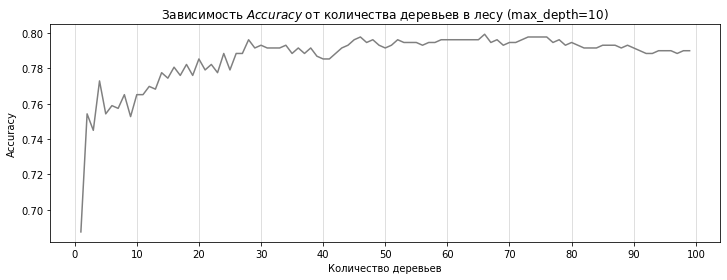

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(f_list)+1), f_list, color='grey')
plt.xlabel('Количество деревьев')
plt.ylabel('Accuracy');
plt.title('Зависимость $Ассuracy$ от количества деревьев в лесу (max_depth=10)');
plt.grid(axis='x', alpha=0.5);
plt.xticks(np.arange(0, 110, step=10));

**Вывод:** Accuracy модели Случайный лес резко растет с увеличением количества деревьев до 5, потом плавно увеличивается примерно до 30, дальше существенного улучшения не наступает. Значит, нет необходимости строить лес большого размера. Чтобы зря не тратить память при вычислении результата, ограничим следующую модель 60 деревьями.

#### Случайный лес с разной глубиной и разным количеством деревьев

In [21]:
best_forest_model = None
best_forest_result = 0
best_forest_est = 0
best_forest_depth = 0
est_dict = {}
for est in range(10, 61, 10):
    forest_result_list = []
    for depth in range (1, 21):
        forest_model = RandomForestClassifier(random_state=123, n_estimators=est, max_depth=depth)
        forest_model.fit(features_train, target_train) 
        forest_result = forest_model.score(features_valid, target_valid)
        forest_result_list.append(forest_result)
        if forest_result > best_forest_result:
            best_forest_model = forest_model
            best_forest_result = forest_result
            best_forest_est = est
            best_forest_depth = depth
    est_dict[est] = (forest_result_list)
print("Accuracy наилучшей модели случайного леса на валидационной выборке:", best_forest_result)
print("Количество деревьев:", best_forest_est)
print("Максимальная глубина:", best_forest_depth)

# запишем с ловарь лучший результат модели
models_dict['RF'] = best_forest_result

Accuracy наилучшей модели случайного леса на валидационной выборке: 0.8055987558320373
Количество деревьев: 40
Максимальная глубина: 13


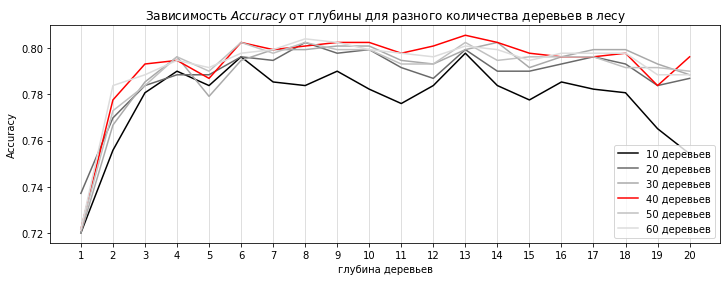

In [22]:
colors = ['black','dimgray', 
          'darkgrey','red',
          'silver','gainsboro']
plt.figure(figsize=(12, 4))
for i, color in zip(range(10, 61, 10), colors):
    plt.plot(range(1, 21), est_dict[i], label=str(i), color=color)
    plt.legend(['10 деревьев', '20 деревьев',
                '30 деревьев', '40 деревьев',
                '50 деревьев', '60 деревьев'], loc='lower right')
plt.xlabel('глубина деревьев')
plt.ylabel('Accuracy');
plt.grid(axis='x', alpha=0.5);
plt.xticks(np.arange(1, 21, step=1));
plt.title('Зависимость $Ассuracy$ от глубины для разного количества деревьев в лесу');

**Вывод:** Модель случайного леса показала лучший результат при следующих гиперпараметрах: 40 деревьев глубиной 13. На графике вмдно, что именно это количество деревьев дает постоянный пророст *Accuracy*.

### Выбираем лучшую модель

In [23]:
models_df = pd.DataFrame(data=models_dict, index=['Accuracy'])

In [24]:
models_df

,LR,DT,RF
Accuracy,0.732504,0.783826,0.805599


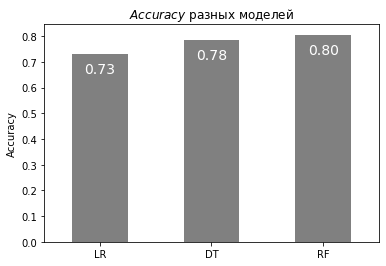

In [25]:
ax = models_df.T.plot(kind='bar', label='index', color='grey', rot=0, figsize=(6,4), legend=False)

ax.text(x=0, y=models_df.iloc[0][0]-0.075, s='0.73', color = 'white', ha="center", size=14)
ax.text(x=1, y=models_df.iloc[0][1]-0.075, s='0.78', color = 'white', ha="center", size=14)
ax.text(x=2, y=models_df.iloc[0][2]-0.075, s='0.80', color = 'white', ha="center", size=14)
plt.ylabel('Accuracy');
plt.title('$Ассuracy$ разных моделей');

**Вывод**: в качестве модели на использования выбираем Случайный лес из 40 деревьев с глубиной 13, она показала Accuracy *0.8* на валидационной выборке.

## Проверка модели на тестовой выборке

In [26]:
# проверяем на тестовой выборке
test_result = best_forest_model.score(features_test, target_test)
test_result

0.8102643856920684

In [27]:
# объединяем трейн и валидацию, чтобы дообучить модель
features_concatenated = pd.concat([features_train, features_valid])
target_concatenated = pd.concat([target_train, target_valid])

In [28]:
# лучше ли работает дообученная модель?
my_model = RandomForestClassifier(random_state=123, n_estimators=40, max_depth=13)
my_model.fit(features_concatenated, target_concatenated) 
my_result = my_model.score(features_test, target_test)
my_result

0.8040435458786936

**Вывод:** результат на тестовой выборке выше у начальной модели, а не у той, которую мы дообучали на объединенном датасете.

## (бонус) Проверка модели на адекватность

In [29]:
sanity_1_0 = np.random.randint(2, size=target_test.shape[0])
sanity_0 = np.random.randint(1, size=target_test.shape[0])

In [30]:
sanity_1_0_accuracy = accuracy_score(target_test, sanity_1_0)
sanity_1_0_accuracy

0.46967340590979784

In [31]:
sanity_0_accuracy = accuracy_score(target_test, sanity_0)
sanity_0_accuracy

0.6998444790046656

**Вывод:** accuracy на предсказаниях нашей модели лучше, чем на случайном наборе ответов. При этом результат векторе из нолей лучше, так как изначально у нас классы 1 и 0 были несбалансированы.

## Выводы

Перед нами стояла задача построить систему, способную предложить пользователям подходящий тариф: СМАРТ или УЛЬТРА. Это задача классификации.

Мы проверили несколько моделей: логистическую регрессию, дерево решений и случайный лес. Наибольшее внимание уделили лесу, перебрали несколько гиперпараметров: несколько вариантов количества деревьев, каждое из которых разной глубины.

Модели показали следующие результаты:

модель | качество на валидации
-------|----------------------
логистическая регрессия|0.73
дерево решений|0.78
случайный лес|0.81

**В итоге** случайный лес победил, с пареметрами 40 деревьев глубиной 13. Эта модель показала *Accuracy* 0.81 на тестовой выборке.

Проверка модели на адекватность показала, что предложения тарифов, полученные с помощью модели, лучше, чем случайный выбор одного из двух или чем просто рекомендация тарифа СМАРТ всем абонентам подряд.